In [1]:
library(tidyverse)
library(cowplot)
library(scales)
library(RColorBrewer)

devtools::load_all(".")

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************


Attaching package: ‘scales’

The following object is masked from ‘package:purrr’:

    discard

The following object is masked from ‘package:readr’:

    col_factor

Loading ychr


In [19]:
ages <- tribble(
    ~"name", ~"age_low", ~"age_high",
    "Mezmaiskaya 2", 42960, 44600,
    "Spy 94a", 37880, 39150,
    "El Sidrón 1253", 44000, 44000,
    "Denisova 4", 55200, 84100,
    "Denisova 8", 105600, 136400
) %>% assign_set

In [3]:
kya <- function (x) {
    number_format(
        accuracy = 1,
        scale = 1/1000,
        suffix = " kya",
        big.mark = ",")(x)
}

In [4]:
(colors <- brewer.pal(n = 4, name = "Set2"))

[1] "#66C2A5" "#FC8D62" "#8DA0CB" "#E78AC3"

In [5]:
p1 <- ggdraw() + draw_image("../figures/map.png")

In [22]:
colors <- hue_pal()(3)[2:3]

In [23]:
colors

[1] "#00BA38" "#619CFF"

In [39]:
p2 <- ages %>%
mutate(age_mean = (age_high + age_low) / 2) %>%
ggplot(aes(fct_reorder(name, age_mean, .desc = T), age_mean, color = set)) +
    geom_linerange(size = 0.5, aes(ymin = age_low, ymax = age_high)) +
    stat_summary(geom = "crossbar", width = 0.2, size = 1, fatten = 0,
                 fun.data = function(x){ return(c(y = median(x), ymin = median(x), ymax = median(x))) }) +
    coord_flip() +
    theme_minimal() +
    theme(axis.title = element_blank(),
          axis.text.y = element_text(size = 12, face = "bold", color = c(rep(colors[1], 2), rep(colors[2], 3))),
          axis.text.x = element_text(size = 13)) +
    guides(color = FALSE) +
    ylab("age [thousand years ago]") +
    scale_y_continuous(labels = kya) +
    scale_x_discrete(position = "top") +
    scale_color_manual(values = colors) +
    background_grid(major = "xy", minor = "xy", size.major = 0.3, size.minor = 0.1,
                    color.major = rgb(0.8, 0.8, 0.8, alpha = 0.5),
                    color.minor = rgb(0.8, 0.8, 0.8, alpha = 0.5)) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm"))

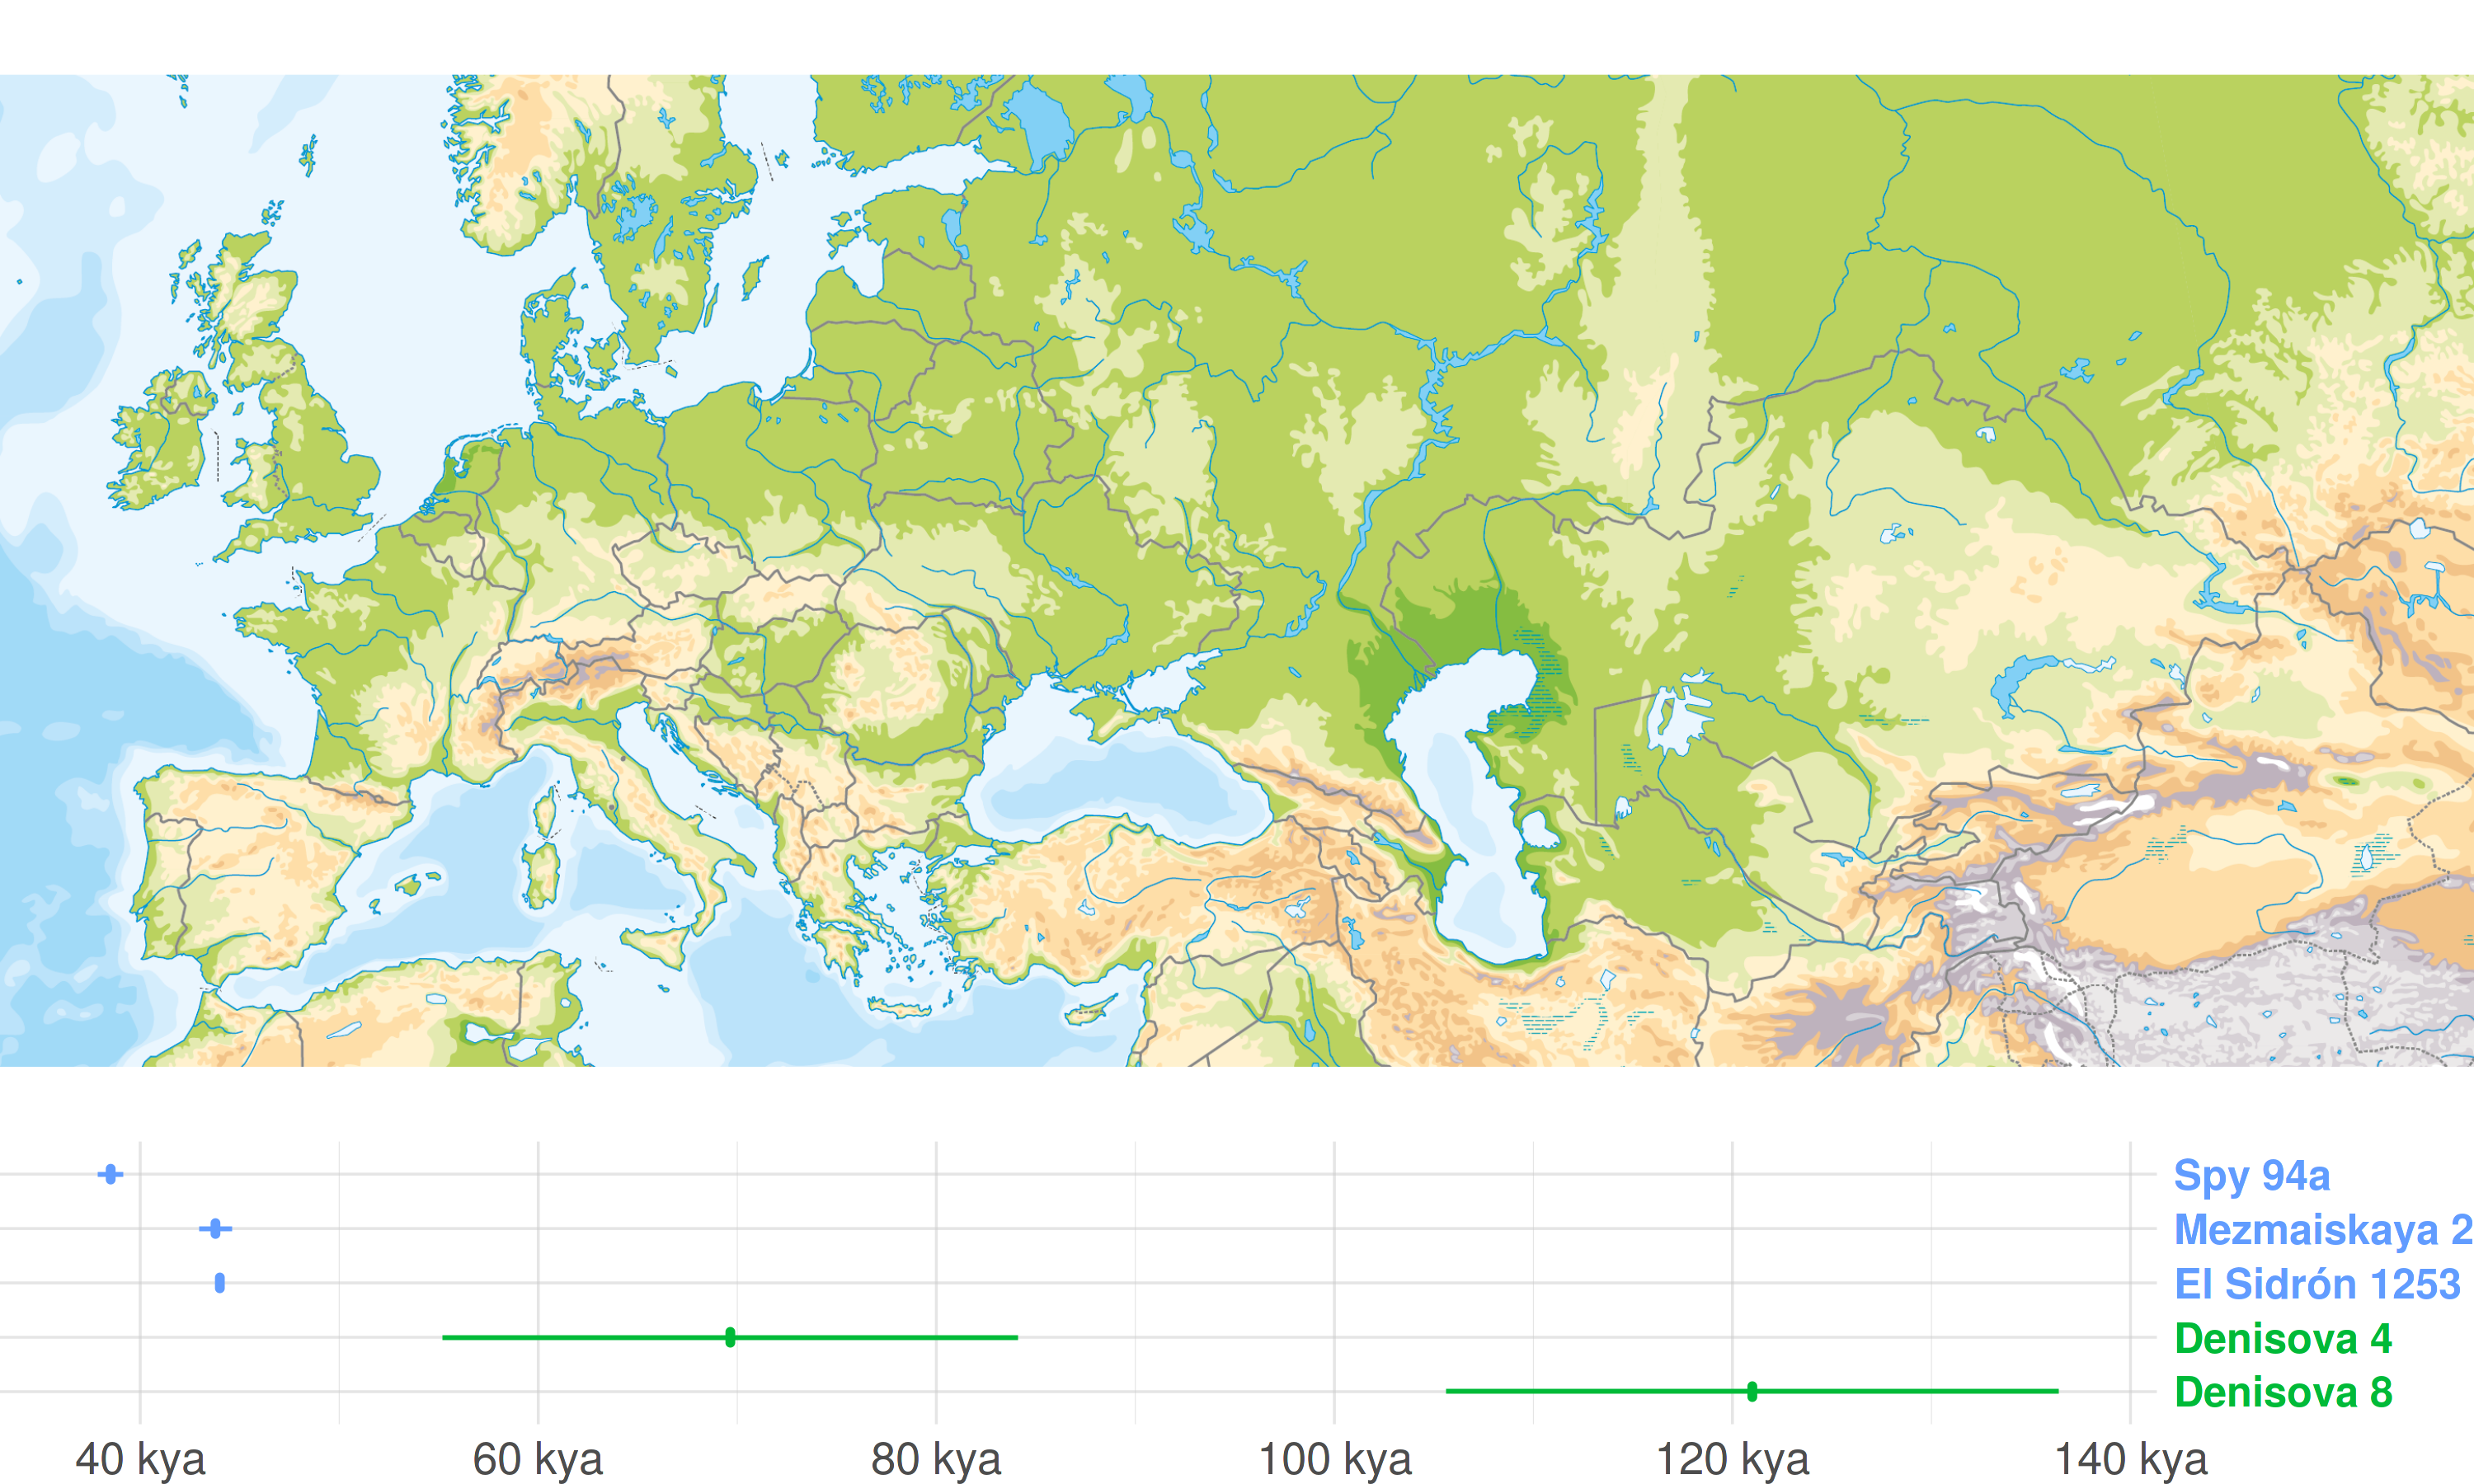

In [40]:
set_dim(10, 6)

plot_grid(p1, p2, rel_heights = c(1, 0.3), nrow = 2)